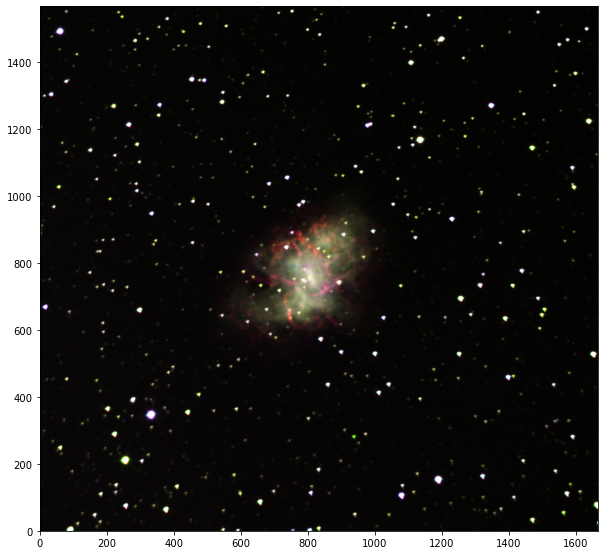

In [97]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb, ImageNormalize, PowerStretch, AsinhStretch, BaseStretch, SqrtStretch, SinhStretch
from pathlib import Path
stretch = PowerStretch(2.25)

def read_and_normalize(path: Path, stretch: BaseStretch = None):
    img = plt.imread(path).astype("float32")
    if stretch is not None:
        normalizer = ImageNormalize(img, stretch=stretch)
        return normalizer(img)
    return img
    
    

G_file = Path("M1B_i30h_Median_r1_r2_c.tif")
B_file = Path("M1V_g30h_Median_r1_r2_c.tif")
R_file = Path("M1R_r30h_Median_r1_r2_c.tif")

R = read_and_normalize(R_file, stretch)
G = read_and_normalize(G_file, stretch)
B = read_and_normalize(B_file, stretch)

rgb = make_lupton_rgb(R, G, B, stretch=0.85, Q=0.85, filename="Crab_Colourized_Lupton.png")
plt.figure(figsize=(10,10))
plt.imshow(rgb, origin="lower")